### Importing required libraries.

In [1]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import astsadata

c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarni

### Importing the data in the dataframe.

In [2]:
data = pd.read_csv('sunactivity.csv')
data.head()

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


### Ploting initial data,

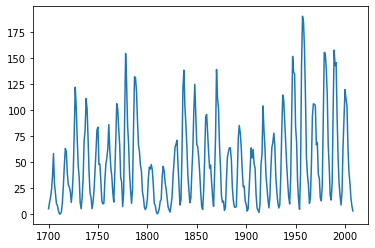

In [3]:
plt.plot(data['YEAR'],data['SUNACTIVITY'])

### plotting Acf and Pacf of the data for nlags = 40.

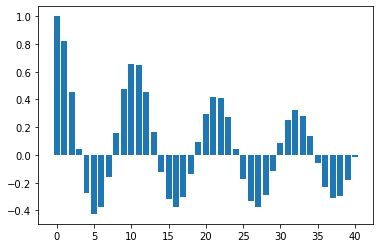

In [4]:
pacf_data = pacf(data['SUNACTIVITY'], nlags=40)
acf_data = acf(data['SUNACTIVITY'], nlags=40)
plt.bar(np.arange(41), acf_data)
plt.show()

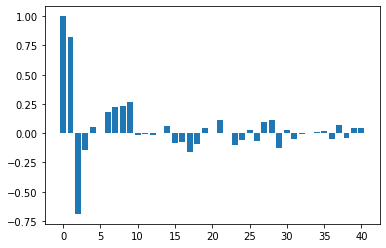

In [5]:
plt.bar(np.arange(41), pacf_data)
plt.show()

### Acf plot shows gradual decreasing and Pacf plot shows some significant values and cut lags after some k, which says that AR would be the best fit and Possible order of AR may be 2, 3, or 4 from pacf plot. Now let's simulate.

### Applying and Choosing best order for AR process.

In [6]:
#Storing the expected orders
orders=[(i,0,j) for i in range(15) for j in range(1)]

In [7]:
#Storing the models for all the expected orders
from statsmodels.tsa.arima.model import ARIMA
fitted_model=[]
for i in range(len(orders)):
    fitted_model.append(ARIMA(data['SUNACTIVITY'], order=orders[i], trend='n'))

In [8]:
#Storing the fitted models
fitted_model_results = []
for i in range(len(orders)):
    fitted_model_results.append(fitted_model[i].fit())

### Plotting AIC values of AR process,

In [9]:
for i in range(len(orders)):
    print(i, "AIC:", fitted_model_results[i].aic,orders[i])

0 AIC: 3449.876463184443 (0, 0, 0)
1 AIC: 2834.3241523937995 (1, 0, 0)
2 AIC: 2701.040923614845 (2, 0, 0)
3 AIC: 2697.684829501402 (3, 0, 0)
4 AIC: 2675.9664238171013 (4, 0, 0)
5 AIC: 2668.7651744905675 (5, 0, 0)
6 AIC: 2644.605369738345 (6, 0, 0)
7 AIC: 2618.14462780456 (7, 0, 0)
8 AIC: 2598.139988843195 (8, 0, 0)
9 AIC: 2576.0580928164927 (9, 0, 0)
10 AIC: 2577.965097590002 (10, 0, 0)
11 AIC: 2579.767927381371 (11, 0, 0)
12 AIC: 2581.64597231026 (12, 0, 0)
13 AIC: 2583.522502202686 (13, 0, 0)
14 AIC: 2583.7631549906027 (14, 0, 0)


### According to AIC values, AR of order 2 is the best fit of the data.

In [10]:
#Best fit of the data Model with minimum aic value
print(fitted_model_results[2].summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1347.520
Date:                Mon, 07 Mar 2022   AIC                           2701.041
Time:                        15:57:49   BIC                           2712.241
Sample:                             0   HQIC                          2705.519
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4809      0.037     39.534      0.000       1.407       1.554
ar.L2         -0.5933      0.046    -12.958      0.000      -0.683      -0.504
sigma2       355.9017     20.313     17.520      0.0

### Hence, from above summary, Coefficienst of AR are [1.4809, -0.5933] and have Varinace = 355.9017.

### { Xt } = A0  + 1.4809 * Xt-1 + -0.5933 * Xt-2 + Epsilon, which has mean = 0 and Variance = 355.9017

In [11]:
Mean  = np.mean(data['SUNACTIVITY'])
Mean

49.75210355987054

### Mean of the data is not zero, hence A0 will be non Zero, finding A0,

In [12]:
A0 = Mean * (1 - 1.4809 - (-0.5933))
A0

5.592136440129446

### Hence, Final Equation of AR of order 2 would be,
#### { Xt } = 5.592136440129446 + 1.4809 * Xt-1 + -0.5933 * Xt-2 + Epsilon, which has mean = 0 and Variance = 355.9017